<a href="https://colab.research.google.com/github/sbborusu/530pm_Agentic_Ai_Batch_7thApril/blob/main/CodeBasics_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict price based on area

In [46]:
from sklearn import linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv(r'/content/housing_price_area_based.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    5 non-null      int64
 1   price   5 non-null      int64
dtypes: int64(2)
memory usage: 212.0 bytes


In [48]:
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


# Plot a scatter plot to get an idea about distribution of my dataset

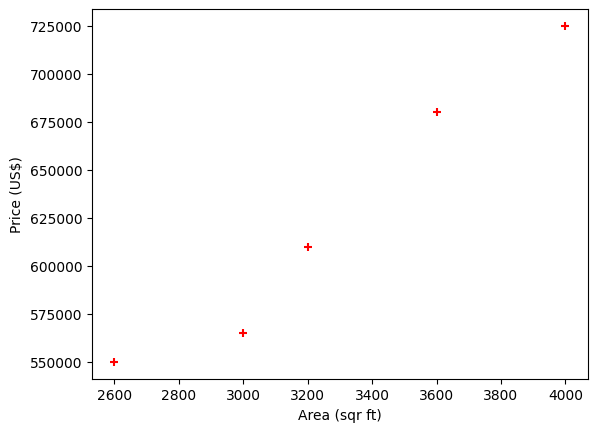

In [49]:
# I get an idea here that the distribution of my data in my dataset follows linear regression model
plt.scatter(df.area, df.price, color='red', marker='+')
plt.xlabel('Area (sqr ft)')
plt.ylabel('Price (US$)')
plt.show()

# Create a model

In [50]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price) # input should be 2d and output should be 1d

LinearRegression()

# Find the equation

In [51]:
intercept = reg.intercept_ # There will be always be only one intercept/starting point, whether its SLR or MLR
slope = reg.coef_ # There could be more than one co-efficient/slope/ Gradient (specially in multiple linear regression) thats why the return type is an array
print(intercept, slope)
print(f'y = {slope[0]}x + {intercept}') # y = mx + c (SLR)

180616.43835616432 [135.78767123]
y = 135.78767123287673x + 180616.43835616432


# Predict the price of home

In [52]:
predict_df_3300 = pd.DataFrame({'area' : [3300]})
reg.predict(predict_df_3300)


array([628715.75342466])

# How the model predicted the above price

In [53]:
# The mode uses y = mx + c equation it formed during its training using fit function.
# m - slope variable
# c - intercept variable
# x - input feature i.e., 3300 in our case

y = slope * 3300 + intercept
y

array([628715.75342466])

# How does the linear equation line look

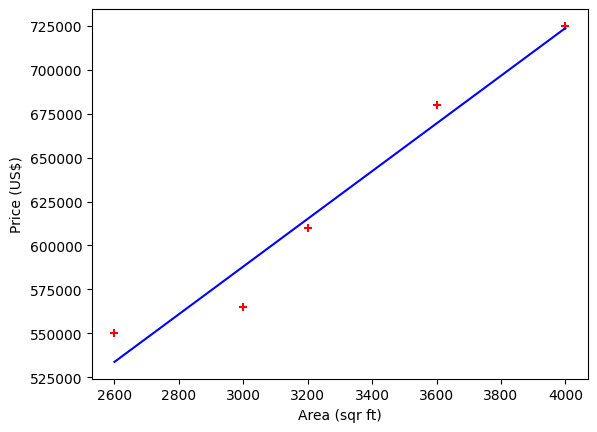

In [56]:
# I get an idea here that the distribution of my data in my dataset follows linear regression model
plt.scatter(df.area, df.price, color='red', marker='+') # scatter plot for actual area and actual price
plt.plot(df.area, reg.predict(df[['area']]), color='blue') # line plot for actual area and predicted price
plt.xlabel('Area (sqr ft)')
plt.ylabel('Price (US$)')
plt.show()

# Predict for multiple inputs from a new file

In [54]:
predict_df = pd.read_csv(r'/content/housing_price_area_based_predict.csv')
predict_df['price'] = reg.predict(predict_df[['area']])
#predict_df
predict_df.to_csv('predict.csv', index=False) # index removes the index from the output file